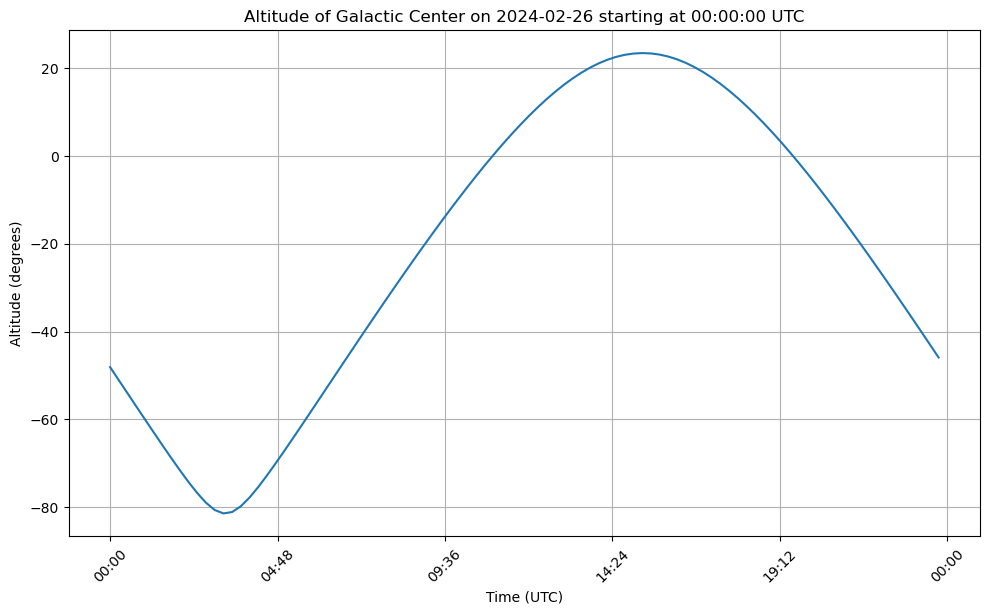

In [19]:
#This is a calculation unit to compute the galaxy altitude for BEACON antenna array 
#it takes in the site time for BEACON time and use two function both calculate or plot out the galaxy altitude at the given date


#Last update Aug 29 2024
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def get_galaxy_altitudes(start_time, end_time, time_step=1./96.):
    """
    Calculate the altitude of a galaxy over a time range at a specific observer location.

    Parameters:
    start_time (str): Start time in 'YYYY-MM-DD HH:MM:SS' format.
    end_time (str): End time in 'YYYY-MM-DD HH:MM:SS' format.
    time_step (float): Time step in fractional days (e.g., 1/24 for one hour).
    galaxy_ra (str): Right ascension of the galaxy (e.g., '17h45m40.04s').
    galaxy_dec (str): Declination of the galaxy (e.g., '-29d00m28.1s').

    Returns:
    altitudes (np.ndarray): Array of altitudes at each time step.
    times (Time): Array of Time objects corresponding to each altitude.
    """
    
    # Define the galaxy's coordinates
    #coord for milky way center
    galaxy_coord = SkyCoord(ra='17h45m40.04s', dec='-29d00m28.1s', frame='icrs')
    
    # Define the observer's location
    observer_location = EarthLocation(lat=37.589*u.deg, lon=-118.238*u.deg, height=3865*u.m)
    
    # Create a time array from start_time to end_time with the given time_step
    times = Time(np.arange(Time(start_time).jd, Time(end_time).jd, time_step), format='jd')
    
    # Create an AltAz frame for the observer's location and times
    altaz_frame = AltAz(obstime=times, location=observer_location)
    
    # Transform the galaxy coordinates to the AltAz frame
    galaxy_altaz = galaxy_coord.transform_to(altaz_frame)
    
    # Return the altitudes and corresponding times
    return galaxy_altaz.alt, times

def plot_altitudes(altitudes, times):
    """
    Plot the altitude of an astronomical object over time.

    Parameters:
    altitudes (np.ndarray): Array of altitude values.
    times (Time): Array of Astropy Time objects corresponding to the altitudes.
    """
    # Extracting the year, month, day, and start time for the title
    start_time_obj = times[0]  # The first time in the array
    date_str = start_time_obj.strftime('%Y-%m-%d')
    time_str = start_time_obj.strftime('%H:%M:%S')
    
    # Plotting Time vs Altitude with the dynamic title
    plt.figure(figsize=(10, 6))
    plt.plot(times.plot_date, altitudes, '-')
    plt.title(f'Altitude of Galactic Center on {date_str} starting at {time_str} UTC')
    plt.xlabel('Time (UTC)')
    plt.ylabel('Altitude (degrees)')
    plt.grid(True)
    
    # Format the x-axis to show hours and minutes
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    plt.tight_layout()
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.show()

# Example usage
start_time = '2024-02-26 00:00:00'
end_time = '2024-02-26 23:59:59'
altitudes, times = get_galaxy_altitudes(start_time, end_time)


# Example usage with the previously generated data
plot_altitudes(altitudes, times)